This Python script handles preprocessing of the COCO (Common Objects in Context) dataset. The preprocessing includes loading the dataset, resizing images, normalizing pixel values.

##Loading Dataset in google colab from gdrive

In [12]:
!gdown --folder --id 1B19RWODijlUlXEdvLKxjcmlg-BiJcbWE -O /content/shared_folder

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Retrieving folder contents
Processing file 1tytlWWD1IqtyH3UY1cNDe5y00QJwuGh7 coco2017_subset.zip
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1tytlWWD1IqtyH3UY1cNDe5y00QJwuGh7
From (redirected): https://drive.google.com/uc?id=1tytlWWD1IqtyH3UY1cNDe5y00QJwuGh7&confirm=t&uuid=45530cc1-b4c6-4923-8a6c-e5dec53e895a
To: /content/shared_folder/coco2017_subset.zip
100% 6.71G/6.71G [01:42<00:00, 65.3MB/s]
Download completed


In [13]:
import os
os.listdir("/content/shared_folder")

['coco2017_subset.zip']

In [16]:
!unzip -o /content/shared_folder/coco2017_subset.zip -d /content/extracted_files/coco2017_subset

Streaming output truncated to the last 5000 lines.
  inflating: /content/extracted_files/coco2017_subset/coco2017_subset/train2017/000000508801.jpg  
  inflating: /content/extracted_files/coco2017_subset/coco2017_subset/train2017/000000508836.jpg  
  inflating: /content/extracted_files/coco2017_subset/coco2017_subset/train2017/000000508855.jpg  
  inflating: /content/extracted_files/coco2017_subset/coco2017_subset/train2017/000000508861.jpg  
  inflating: /content/extracted_files/coco2017_subset/coco2017_subset/train2017/000000508878.jpg  
  inflating: /content/extracted_files/coco2017_subset/coco2017_subset/train2017/000000508881.jpg  
  inflating: /content/extracted_files/coco2017_subset/coco2017_subset/train2017/000000508906.jpg  
  inflating: /content/extracted_files/coco2017_subset/coco2017_subset/train2017/000000508938.jpg  
  inflating: /content/extracted_files/coco2017_subset/coco2017_subset/train2017/000000508969.jpg  
  inflating: /content/extracted_files/coco2017_subset/coco

## Importing required libraries

In [37]:
#Importing required libraries

import os
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
import cv2
import seaborn as sns
import random
from skimage import io
import albumentations as A
import json

## Configuration for the coco train json file

In [40]:
#Path to your COCO annotation file - json file

ANNOTATION_FILE = "/content/extracted_files/coco2017_subset/annotation_subset/instances_train2017_subset.json"

#Folder where the corresponding images are stored

IMAGE_FOLDER = "/content/extracted_files/coco2017_subset/train2017"
OUTPUT_FOLDER = "/content/extracted_files/coco2017_subset/preprocessed_images"

In [42]:
# Ensure output folder exists
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

## Loading Dataset

In [43]:
#Initializing COCO API for instance annotations

coco = COCO(ANNOTATION_FILE)

loading annotations into memory...
Done (t=5.32s)
creating index...
index created!


In [44]:
# Get image IDs and info
image_ids = coco.getImgIds()
images = coco.loadImgs(image_ids)

## Resizing

In [45]:
# Set resize dimensions
new_size = (416, 416)

In [46]:
# Process all images
for img_info in images:
    img_name = img_info['file_name']
    img_path = os.path.join(IMAGE_FOLDER, img_name)

    img = cv2.imread(img_path)
    if img is None:
        print(f"Skipping {img_name}, couldn't load.")
        continue

    resized_img = cv2.resize(img, new_size)

    # Save resized image
    output_path = os.path.join(OUTPUT_FOLDER, img_name)
    cv2.imwrite(output_path, resized_img)

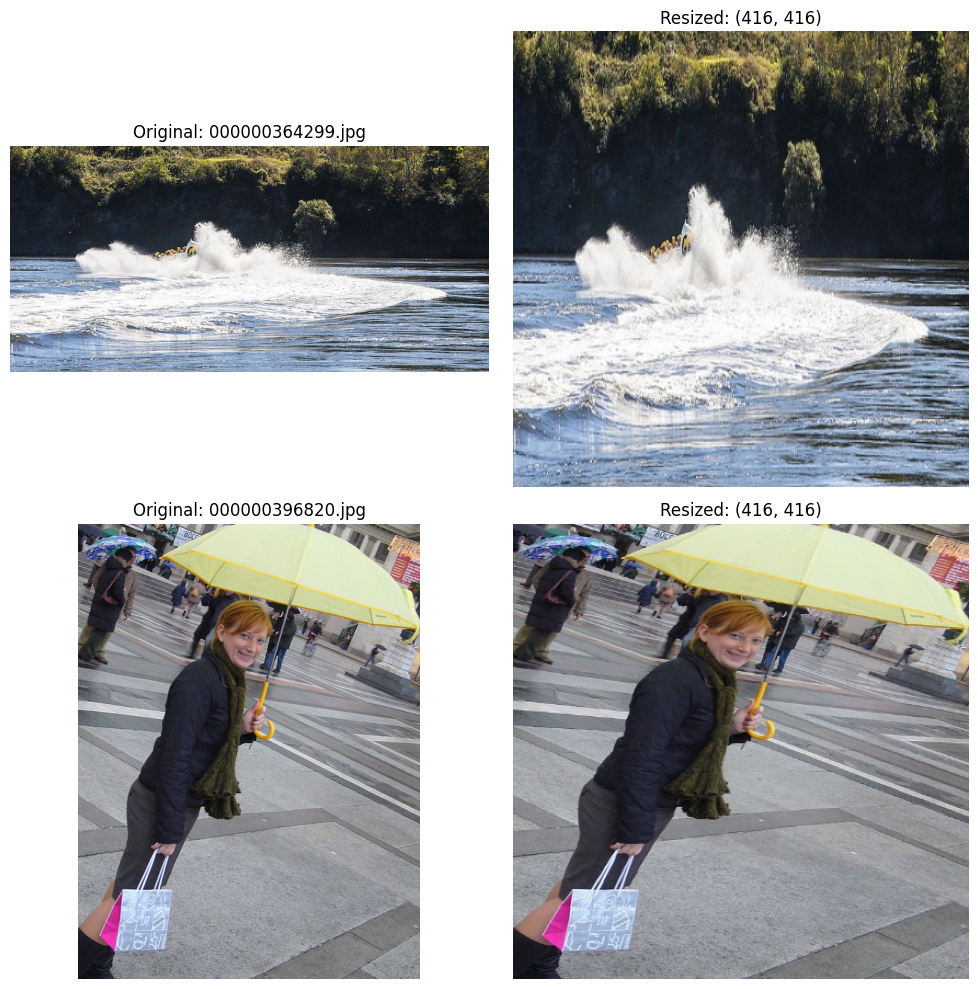

In [47]:
# Select 2 sample images for visualization
sample_images = images[521:523]

# Plot setup for before-and-after comparison
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i, img_info in enumerate(sample_images):
    img_name = img_info['file_name']
    original_path = os.path.join(IMAGE_FOLDER, img_name)
    resized_path = os.path.join(OUTPUT_FOLDER, img_name)

    original_img = cv2.imread(original_path)
    resized_img = cv2.imread(resized_path)

    if original_img is None or resized_img is None:
        print(f"Skipping {img_name}, couldn't load for display.")
        continue

    # Convert BGR to RGB for Matplotlib
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
    resized_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)

    # Show original and resized images
    axes[i, 0].imshow(original_img)
    axes[i, 0].set_title(f"Original: {img_name}")
    axes[i, 0].axis("off")

    axes[i, 1].imshow(resized_img)
    axes[i, 1].set_title(f"Resized: {new_size}")
    axes[i, 1].axis("off")

plt.tight_layout()
plt.show()

## Normalization

In [48]:
# Process all resized images with normalization
for img_name in os.listdir(OUTPUT_FOLDER):
    img_path = os.path.join(OUTPUT_FOLDER, img_name)

    img = cv2.imread(img_path)
    if img is None:
        print(f"Skipping {img_name}, couldn't load.")
        continue

    # Normalize the image (scaling pixel values to [0,1])
    normalized_img = img.astype(np.float32) / 255.0

    # Convert back to uint8 for saving (optional, if needed for further processing)
    output_img = (normalized_img * 255).astype(np.uint8)

    # Save normalized image
    cv2.imwrite(img_path, output_img)

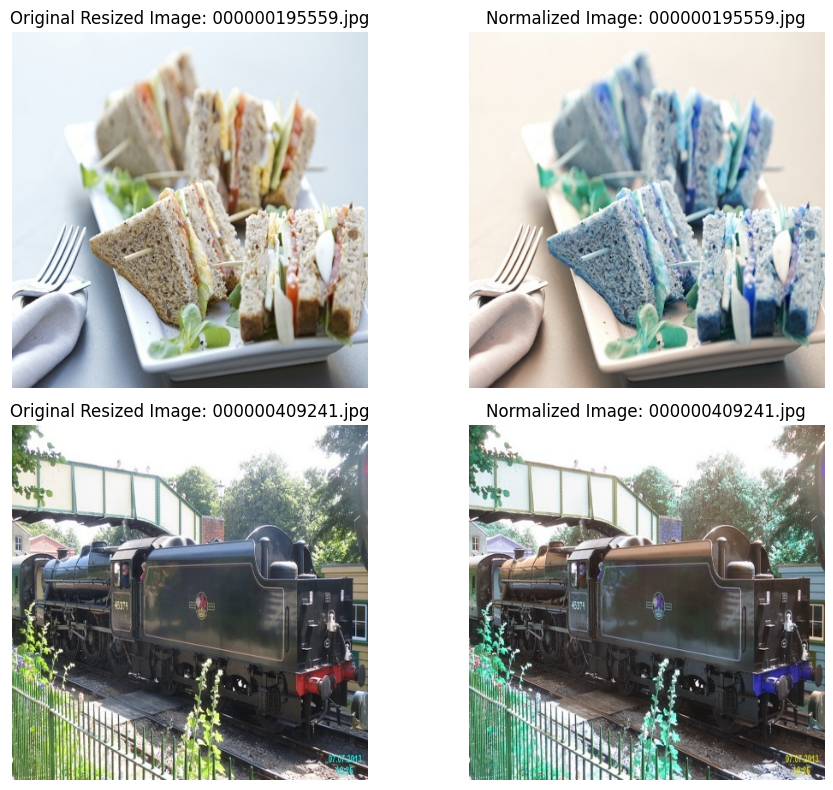

In [49]:
sample_images = os.listdir(OUTPUT_FOLDER)[:2]

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for i, img_name in enumerate(sample_images):
    img_path = os.path.join(OUTPUT_FOLDER, img_name)

    # Read the original resized image
    img = cv2.imread(img_path)
    if img is None:
        print(f"Skipping {img_name}, couldn't load.")
        continue

    # Normalize the image
    normalized_img = img.astype(np.float32) / 255.0

    # Display original resized image
    axes[i, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[i, 0].set_title(f"Original Resized Image: {img_name}")
    axes[i, 0].axis("off")

    # Display normalized image
    axes[i, 1].imshow(normalized_img)
    axes[i, 1].set_title(f"Normalized Image: {img_name}")
    axes[i, 1].axis("off")

plt.tight_layout()
plt.show()

Image Name: 000000577140.jpg
Original Image - Min: 0 Max: 255
Normalized Image - Min: 0.0 Max: 1.0


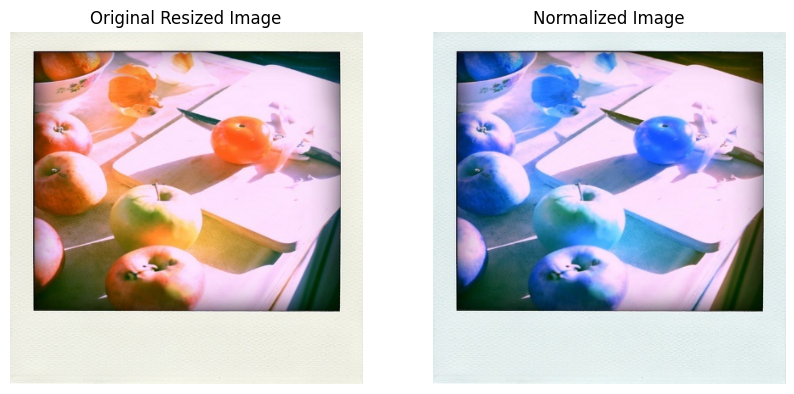

In [50]:
sample_image = os.listdir(OUTPUT_FOLDER)[5]  # Picking the first image
img_path = os.path.join(OUTPUT_FOLDER, sample_image)

# Read the image
img = cv2.imread(img_path)

if img is None:
    print(f"Error: Could not load {sample_image}")
else:
    # Print original image min & max values
    print(f"Image Name: {sample_image}")
    print("Original Image - Min:", img.min(), "Max:", img.max())

    # Normalize the image
    normalized_img = img.astype(np.float32) / 255.0

    # Print normalized image min & max values
    print("Normalized Image - Min:", normalized_img.min(), "Max:", normalized_img.max())

    # Convert BGR to RGB for correct color display in matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display original and normalized images side by side
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(img_rgb)
    axes[0].set_title("Original Resized Image")
    axes[0].axis("off")

    axes[1].imshow(normalized_img)
    axes[1].set_title("Normalized Image")
    axes[1].axis("off")

    plt.show()

## Data Augmentation



In [51]:
IMAGE_FOLDER = "/content/extracted_files/coco2017_subset/preprocessed_images"
OUTPUT_FOLDER = "/content/extracted_files/coco2017_subset/augmented_images"

# Ensure output directory exists
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# Define augmentation pipeline (without bbox processing)
transform = A.Compose([
    A.HorizontalFlip(p=0.5),  # Flip 50% of the images
    A.RandomBrightnessContrast(p=0.3),  # Adjust brightness & contrast
    A.Rotate(limit=30, p=0.5),  # Rotate ±30 degrees
    A.GaussNoise(var_limit=(10.0, 50.0), p=0.3)  # Add Gaussian noise
])

# Process all images in the folder
for img_name in os.listdir(IMAGE_FOLDER):
    img_path = os.path.join(IMAGE_FOLDER, img_name)

    img = cv2.imread(img_path)
    if img is None:
        print(f"Skipping {img_name}, couldn't load.")
        continue

    # Apply augmentation
    augmented = transform(image=img)
    augmented_img = augmented["image"]

    # Convert back to uint8 for saving
    augmented_img = (augmented_img * 255).astype(np.uint8)

    # Save augmented image
    augmented_img_name = f"aug_{img_name}"
    augmented_img_path = os.path.join(OUTPUT_FOLDER, augmented_img_name)
    cv2.imwrite(augmented_img_path, augmented_img)

print("Augmentation complete. Augmented images saved!")

<ipython-input-51-4b3b8456425c>:12: UserWarning: Argument(s) 'var_limit' are not valid for transform GaussNoise
  A.GaussNoise(var_limit=(10.0, 50.0), p=0.3)  # Add Gaussian noise


Augmentation complete. Augmented images saved!


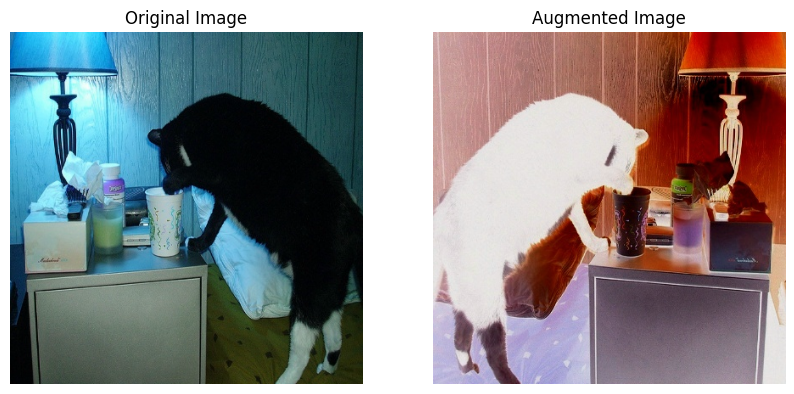

In [52]:

AUGMENTED_FOLDER = "/content/extracted_files/coco2017_subset/augmented_images"

# Pick one specific image
image_name = "000000000675.jpg"

original_path = os.path.join(IMAGE_FOLDER, image_name)
augmented_path = os.path.join(AUGMENTED_FOLDER, f"aug_{image_name}")

# Read images
original_img = cv2.imread(original_path)
augmented_img = cv2.imread(augmented_path)

# Check if images exist
if original_img is not None and augmented_img is not None:
    # Plot both images (display exactly as they are)
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(original_img)  # No color conversion
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    axes[1].imshow(augmented_img)  # No color conversion
    axes[1].set_title("Augmented Image")
    axes[1].axis("off")

    plt.show()
else:
    print("One or both images not found!")
